<h1 id='1.0'> Analyzing AirBnb Data in Seattle</h1>


The following datasets are from: https://www.kaggle.com/datasets/airbnb/seattle

The Airbnb activity includes three datasets:

    1. Listings: full descriptions and average review score
    2. Reviews:  unique id for each reviewer and detailed comments
    3. Calendar: listing id and the price and availability for that day

The below notebook gathers, cleanses, models, and visualizes the dataset in order to evaluate the following questions:

    1. What are the factors that impact listing prices?
    2. How does the price differ among neighborhoods in Seattle?
    3. What is the most popular area?
    4. What price should I expect to pay when renting in Seattle?
    5. What are the cheapest months to travel to Seattle?

See my blog post on [medium](https://medium.com/@aideenfreeman2/airbnb-in-seattle-what-you-should-know-before-booking-a6002cd6a911)

<h2 id='1.0'> 1.0 Importing libraries</h2>

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import datetime
import math
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h2 id='2.0'> 2.0 Importing listings.csv</h2>

In [153]:
df_listings = pd.read_csv('./listings.csv')
df_listings.head(2)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [154]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


<h3 id='2.1'> 2.1 Exploring the dataset</h3>

In [155]:
num_rows = df_listings.shape[0] #Provide the number of rows in the dataset
num_cols = df_listings.shape[1] #Provide the number of columns in the dataset
(num_rows, num_cols) 

(3818, 92)

In [156]:
#check which columns have the most missing values.
nulls = (df_listings.isnull().mean() * 100).sort_values(ascending = False)

<h3 id='2.2'> 2.2 Subsetting the population</h3>

In [157]:
df_listings=df_listings[['id', 'host_id', 'host_response_time', 'host_response_rate',\
                         'host_is_superhost', 'host_total_listings_count',\
                         'neighbourhood_group_cleansed','property_type',\
                         'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',\
                         'bed_type','neighbourhood_cleansed','city',\
                         'amenities', 'price','guests_included', 'extra_people',\
                         'minimum_nights', 'maximum_nights', 'number_of_reviews',\
                         'review_scores_rating', 'state',\
                         'review_scores_cleanliness', 'review_scores_checkin',\
                         'review_scores_communication', 'review_scores_location',\
                         'review_scores_value', 'instant_bookable', 'cancellation_policy']]

<h3 id='2.3'> 2.3 Formatting</h3>

In [158]:
df_listings[['price', 'extra_people','host_response_rate']].isnull().mean() * 100

price                  0.000000
extra_people           0.000000
host_response_rate    13.698271
dtype: float64

In [159]:
df_listings['price'] = df_listings['price'].astype(str).str.replace(',','').str.replace('$','').astype('float') 
df_listings['extra_people'] = df_listings['extra_people'].astype(str).str.replace(',','').str.replace('$','').astype('float') 
df_listings['host_response_rate'] = df_listings['host_response_rate'].astype(str).str.replace("%", "").astype('float')
df_listings['id'] = df_listings['id'].astype(str)
df_listings['host_id'] = df_listings['host_id'].astype(str)

C:\Users\freeman7\AppData\Local\Temp\ipykernel_24328\381915749.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listings['price'] = df_listings['price'].astype(str).str.replace(',','').str.replace('$','').astype('float')
C:\Users\freeman7\AppData\Local\Temp\ipykernel_24328\381915749.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listings['extra_people'] = df_listings['extra_people'].astype(str).str.replace(',','').str.replace('$','').astype('float')


<h3 id='2.4'> 2.4 Exploring data with a float data type</h3>

In [160]:
df_listings.select_dtypes('float').head(2)

,host_response_rate,host_total_listings_count,bathrooms,bedrooms,beds,price,extra_people,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,96.0,3.0,1.0,1.0,1.0,85.0,5.0,95.0,10.0,10.0,10.0,9.0,10.0
1,98.0,6.0,1.0,1.0,1.0,150.0,0.0,96.0,10.0,10.0,10.0,10.0,10.0


In [161]:
# check which float cols have greatest % of nulls
(df_listings[['host_response_rate','host_total_listings_count','bathrooms',\
                   'bedrooms','beds','price','extra_people','review_scores_rating',\
                   'review_scores_cleanliness',\
                   'review_scores_checkin','review_scores_communication',\
                   'review_scores_location','review_scores_value']].isnull().mean() * 100).sort_values(ascending = False)

review_scores_checkin          17.234154
review_scores_value            17.181771
review_scores_location         17.155579
review_scores_cleanliness      17.103195
review_scores_communication    17.050812
review_scores_rating           16.946045
host_response_rate             13.698271
bathrooms                       0.419068
bedrooms                        0.157150
host_total_listings_count       0.052383
beds                            0.026192
price                           0.000000
extra_people                    0.000000
dtype: float64

In [162]:
# fill nulls with mode
for col in ['bathrooms','bedrooms','beds','host_total_listings_count']: 
    df_listings[col].fillna(df_listings[col].mode()[0],inplace = True)
    df_listings[col] = df_listings[col].astype('int')
# fill nulls with mean
for col in ['review_scores_checkin','review_scores_value','review_scores_location','review_scores_cleanliness','review_scores_communication','review_scores_rating','host_response_rate']:
    df_listings[col].fillna(df_listings[col].mean(), inplace = True)

In [163]:
df_listings['property_type'].fillna(df_listings[col].mode()[0],inplace = True)

In [164]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3818 non-null   object 
 1   host_id                       3818 non-null   object 
 2   host_response_time            3295 non-null   object 
 3   host_response_rate            3818 non-null   float64
 4   host_is_superhost             3816 non-null   object 
 5   host_total_listings_count     3818 non-null   int32  
 6   neighbourhood_group_cleansed  3818 non-null   object 
 7   property_type                 3818 non-null   object 
 8   room_type                     3818 non-null   object 
 9   accommodates                  3818 non-null   int64  
 10  bathrooms                     3818 non-null   int32  
 11  bedrooms                      3818 non-null   int32  
 12  beds                          3818 non-null   int32  
 13  bed

<h3 id='2.5'> 2.5 Exploring data with an object data type</h3>

In [165]:
df_listings.select_dtypes('object').head(2)

,id,host_id,host_response_time,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,bed_type,neighbourhood_cleansed,city,amenities,state,instant_bookable,cancellation_policy
0,241032,956883,within a few hours,f,Queen Anne,Apartment,Entire home/apt,Real Bed,West Queen Anne,Seattle,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",WA,f,moderate
1,953595,5177328,within an hour,t,Queen Anne,Apartment,Entire home/apt,Real Bed,West Queen Anne,Seattle,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",WA,f,strict


In [166]:
# check which object cols have greatest % of nulls
(df_listings[['host_response_time','host_is_superhost','neighbourhood_group_cleansed',\
              'property_type','room_type','bed_type',\
              'neighbourhood_cleansed','city','amenities',\
              'instant_bookable','cancellation_policy',\
              'review_scores_location','review_scores_value']].isnull().mean() * 100).sort_values(ascending = False)

host_response_time              13.698271
host_is_superhost                0.052383
neighbourhood_group_cleansed     0.000000
property_type                    0.000000
room_type                        0.000000
bed_type                         0.000000
neighbourhood_cleansed           0.000000
city                             0.000000
amenities                        0.000000
instant_bookable                 0.000000
cancellation_policy              0.000000
review_scores_location           0.000000
review_scores_value              0.000000
dtype: float64

<h3 id='2.6'> 2.6 Exploring data with an int data type</h3>

In [167]:
df_listings.select_dtypes('int').head(2)

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews
0,3,4,1,1,1,2,1,365,207
1,6,4,1,1,1,1,2,90,43


In [168]:
# check which int cols have greatest % of nulls
(df_listings[['host_total_listings_count','accommodates','bathrooms','bedrooms','beds',\
              'guests_included','minimum_nights',\
              'maximum_nights','number_of_reviews']].isnull().mean() * 100).sort_values(ascending = False)

host_total_listings_count    0.0
accommodates                 0.0
bathrooms                    0.0
bedrooms                     0.0
beds                         0.0
guests_included              0.0
minimum_nights               0.0
maximum_nights               0.0
number_of_reviews            0.0
dtype: float64

<h4 id='1.2.6.1'> Do we have any outliers?</h4>

In [169]:
(df_listings[['host_total_listings_count','accommodates','bathrooms','bedrooms','beds',\
              'guests_included','minimum_nights',\
              'maximum_nights','number_of_reviews']]).describe()

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,7.154531,3.349398,1.197748,1.307229,1.735202,1.672603,2.369303,780.447617,22.223415
std,28.620995,1.977599,0.536755,0.882785,1.139393,1.311040,16.305902,1683.589007,37.730892
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000,2.000000
50%,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1125.000000,9.000000
75%,3.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1125.000000,26.000000
max,502.000000,16.000000,8.000000,7.000000,15.000000,15.000000,1000.000000,100000.000000,474.000000


In [170]:
df_listings['minimum_nights'].value_counts().sort_index(ascending = False).head() 

1000    1
31      1
30      6
29      1
28      1
Name: minimum_nights, dtype: int64

In [171]:
df_listings['maximum_nights'].value_counts().sort_index(ascending = False).head()

100000       1
1825         1
1125      2453
1000         2
999          1
Name: maximum_nights, dtype: int64

<h4 id='1.2.6.2'> Outlier appear where the minimum nights is 1,000 and the maxmium night is 10,000 </h4>

In [172]:
# Remove from our subset
df_listings_subset = df_listings[~ df_listings['minimum_nights'].isin([1000])]
df_listings_subset = df_listings_subset[~ df_listings_subset['maximum_nights'].isin([100000])]
num_rows = df_listings_subset.shape[0] #Provide the number of rows in the dataset
num_cols = df_listings_subset.shape[1] #Provide the number of columns in the dataset
(num_rows, num_cols) 

(3816, 32)

In [173]:
df_listings_subset[['host_total_listings_count','accommodates','bathrooms',\
             'bedrooms', 'beds', 'guests_included','extra_people',\
             'minimum_nights', 'maximum_nights','number_of_reviews',\
             'review_scores_rating','price','host_response_rate']]

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,price,host_response_rate
0,3,4,1,1,1,2,5.0,1,365,207,95.000000,85.0,96.000000
1,6,4,1,1,1,1,0.0,2,90,43,96.000000,150.0,98.000000
2,2,11,4,5,7,10,25.0,4,30,20,97.000000,975.0,67.000000
3,1,3,1,0,2,1,0.0,1,1125,0,94.539262,100.0,94.886798
4,2,6,2,3,3,6,15.0,1,1125,38,92.000000,450.0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,354,6,2,3,3,1,0.0,3,1125,1,80.000000,359.0,99.000000
3814,1,4,1,1,2,3,25.0,2,29,2,100.000000,79.0,100.000000
3815,1,2,1,1,1,2,20.0,1,7,0,94.539262,93.0,94.886798
3816,1,2,1,0,1,1,0.0,3,1125,0,94.539262,99.0,100.000000


<h3 id='2.7'>  2.7 What are the main drivers for higher listing prices? (Size of place) What attributes in the listing data most associate or contribute to prices? What are some of the features of places with the most reviews? Amenities to include?  
 </h3>

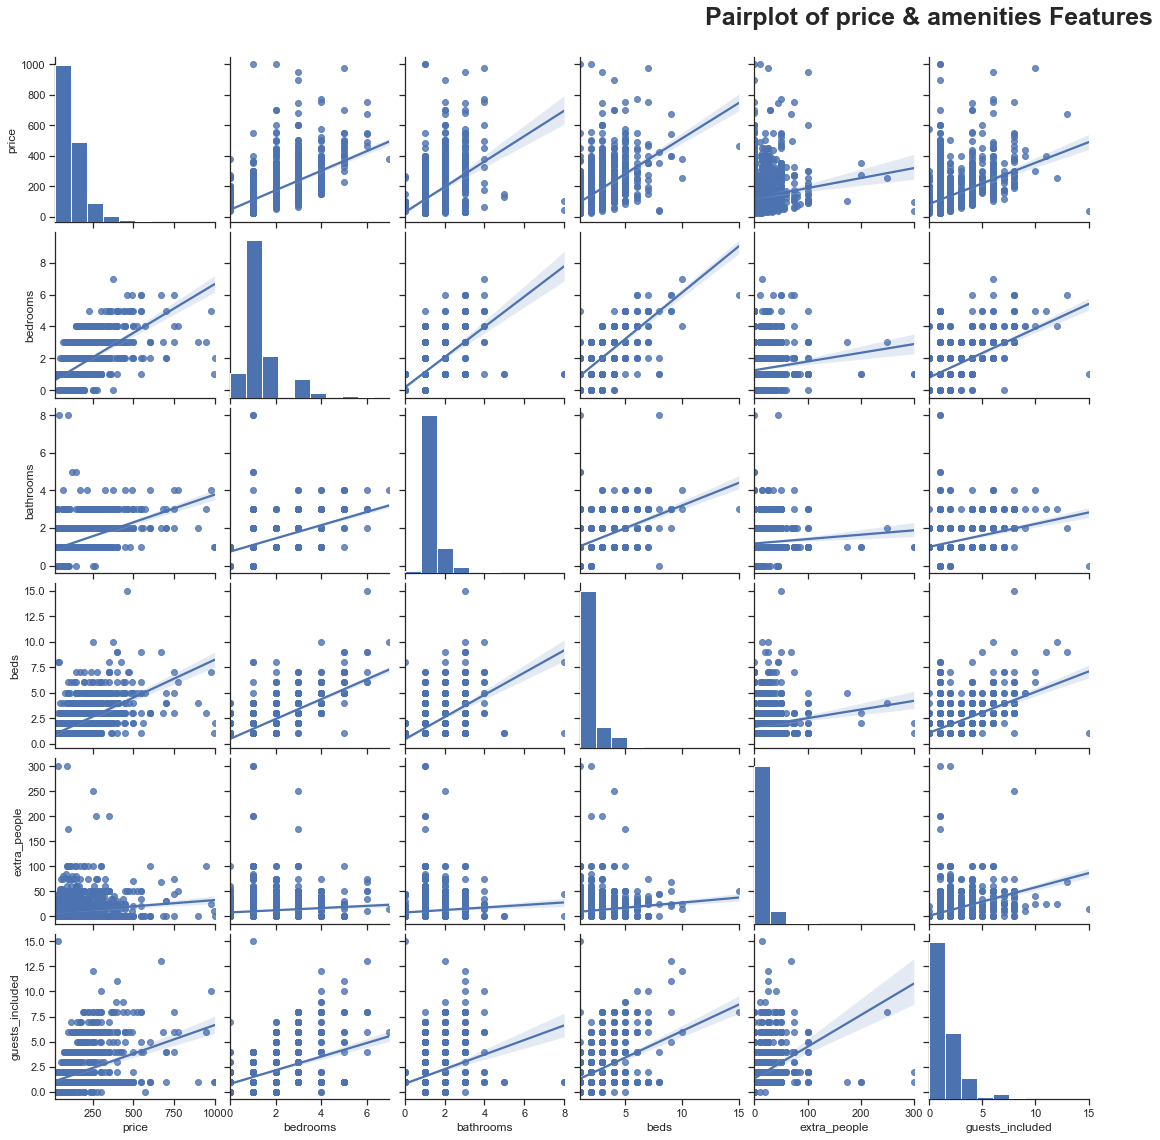

In [174]:
set = ['price','bedrooms','bathrooms','beds','extra_people','guests_included']
sns.set(style = "ticks")
sns.pairplot(df_listings[set], kind = 'reg')
plt.title('Pairplot of price & amenities Features', fontsize = 25, fontweight = 'bold', y=5.4,x=0.0005)
plt.savefig('Pairplot of numerical features')
plt.show()

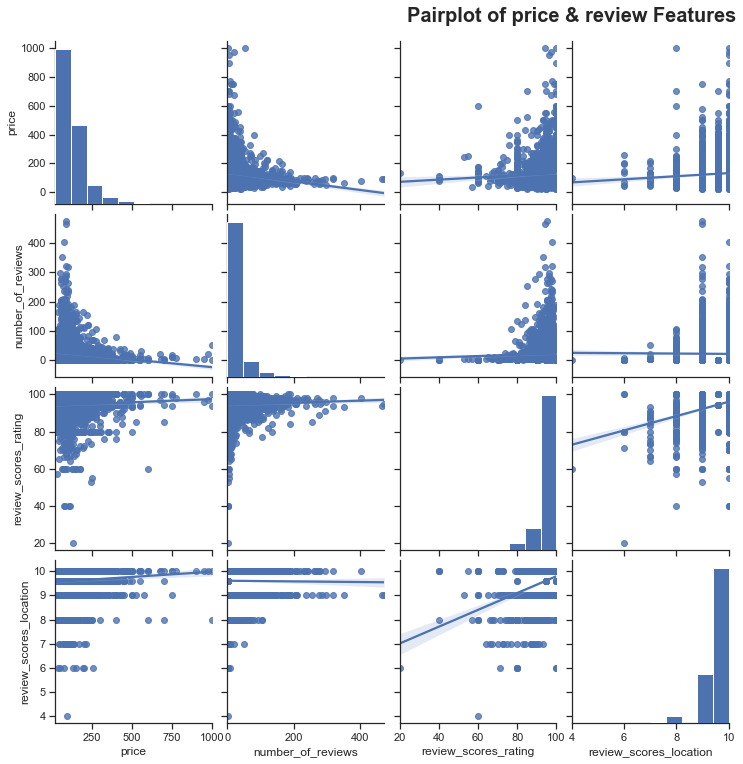

In [175]:
set2 = ['price','number_of_reviews','review_scores_rating','review_scores_location']
sns.set(style = "ticks")
sns.pairplot(df_listings[set2], kind = 'reg')
plt.title('Pairplot of price & review Features', fontsize = 20, fontweight = 'bold', y=3.2,x=0.0005)
plt.savefig('Pairplot of features')
plt.show()

In [176]:
list(df_listings)

['id',
 'host_id',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_total_listings_count',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'neighbourhood_cleansed',
 'city',
 'amenities',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'state',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'cancellation_policy']

In [177]:
corr = df_listings_subset[['accommodates','bathrooms', 'bedrooms', 'beds',\
                    'extra_people','guests_included','host_response_rate',\
                    'host_total_listings_count','maximum_nights','minimum_nights',\
                    'price', 'number_of_reviews','host_is_superhost', 'host_response_rate',\
                    'review_scores_rating']].corr()
corr

,accommodates,bathrooms,bedrooms,beds,extra_people,guests_included,host_response_rate,host_total_listings_count,maximum_nights,minimum_nights,price,number_of_reviews,host_response_rate,review_scores_rating
accommodates,1.000000,0.524620,0.770723,0.861234,0.148434,0.532856,0.005049,0.111311,-0.006034,0.085513,0.652255,-0.072906,0.005049,-0.011937
bathrooms,0.524620,1.000000,0.578882,0.512686,0.076268,0.297529,0.012233,0.080089,-0.036266,0.096580,0.496058,-0.087864,0.012233,0.029882
bedrooms,0.770723,0.578882,1.000000,0.753152,0.108991,0.457047,-0.003450,0.064957,-0.010254,0.127473,0.627651,-0.105766,-0.003450,0.020732
beds,0.861234,0.512686,0.753152,1.000000,0.130893,0.460583,0.014805,0.085521,0.002852,0.094715,0.589054,-0.089137,0.014805,-0.000836
extra_people,0.148434,0.076268,0.108991,0.130893,1.000000,0.422396,0.017412,-0.063507,-0.074336,-0.007111,0.128029,0.044375,0.017412,-0.032709
guests_included,0.532856,0.297529,0.457047,0.460583,0.422396,1.000000,0.061206,-0.059240,-0.074953,0.047468,0.392953,0.028101,0.061206,-0.001286
host_response_rate,0.005049,0.012233,-0.003450,0.014805,0.017412,0.061206,1.000000,0.022091,-0.076430,-0.006111,-0.012749,0.102164,1.000000,0.130097
host_total_listings_count,0.111311,0.080089,0.064957,0.085521,-0.063507,-0.059240,0.022091,1.000000,0.086842,0.034785,0.093876,-0.062199,0.022091,-0.088998
maximum_nights,-0.006034,-0.036266,-0.010254,0.002852,-0.074336,-0.074953,-0.076430,0.086842,1.000000,-0.092017,0.004796,-0.244500,-0.076430,-0.064943
minimum_nights,0.085513,0.096580,0.127473,0.094715,-0.007111,0.047468,-0.006111,0.034785,-0.092017,1.000000,0.097126,-0.056087,-0.006111,0.040108


In [178]:
price_corr =corr['price']
price_corr .sort_values(ascending=False)

price                        1.000000
accommodates                 0.652255
bedrooms                     0.627651
beds                         0.589054
bathrooms                    0.496058
guests_included              0.392953
extra_people                 0.128029
minimum_nights               0.097126
host_total_listings_count    0.093876
review_scores_rating         0.050449
maximum_nights               0.004796
host_response_rate          -0.012749
host_response_rate          -0.012749
number_of_reviews           -0.124724
Name: price, dtype: float64

C:\Users\freeman7\AppData\Local\Temp\ipykernel_24328\3872971299.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype = np.bool))


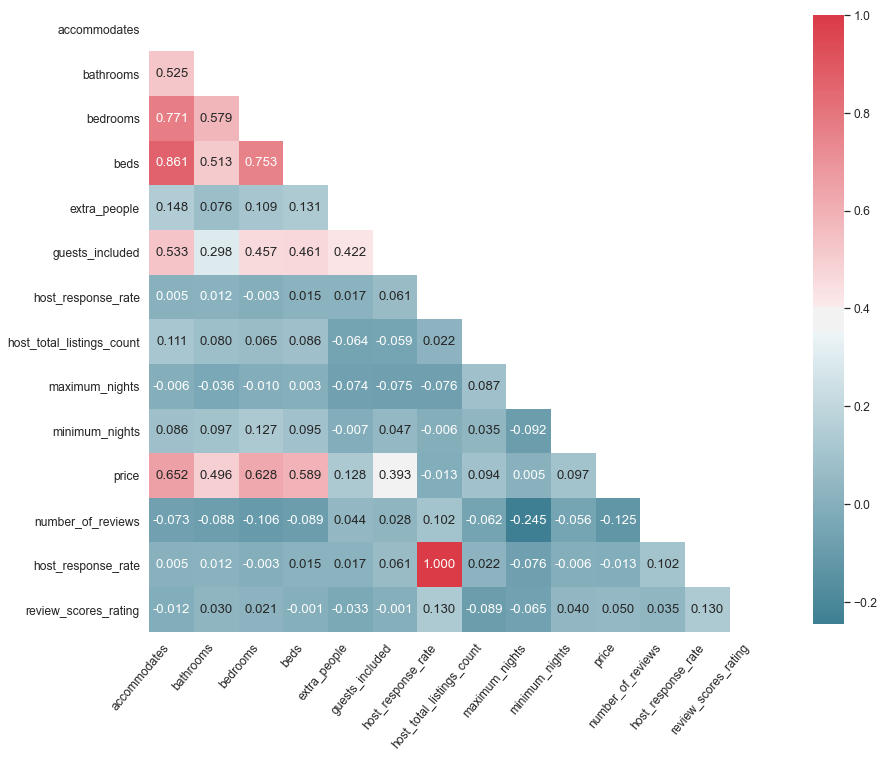

In [179]:
sns.set(font_scale = 1.1, style = "white")
mask = np.triu(np.ones_like(corr, dtype = np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
fig, ax = plt.subplots(figsize = (14,14))  
corr_hm = sns.heatmap(corr, cbar = True, cbar_kws={"shrink": .8}, 
                      annot = True, mask = mask, square = True,cmap = cmap, fmt = '.3f', ax = ax)
corr_hm.set_xticklabels(corr_hm.get_xticklabels(), rotation = 50, horizontalalignment = 'right')
plt.savefig('corr_matrix.png')
plt.show()

In [272]:
(df_listings[['review_scores_rating', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication',\
              'review_scores_location','review_scores_value']].isnull().mean() * 100).sort_values(ascending = False)

review_scores_rating           0.0
review_scores_cleanliness      0.0
review_scores_checkin          0.0
review_scores_communication    0.0
review_scores_location         0.0
review_scores_value            0.0
dtype: float64

In [270]:
review_corr = df_listings[[ 'review_scores_rating', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].corr()
review_corr


,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
review_scores_rating,1.000000,0.641622,0.520164,0.540032,0.367621,0.694942
review_scores_cleanliness,0.641622,1.000000,0.398377,0.388133,0.277592,0.523580
review_scores_checkin,0.520164,0.398377,1.000000,0.684675,0.240859,0.402948
review_scores_communication,0.540032,0.388133,0.684675,1.000000,0.279879,0.456016
review_scores_location,0.367621,0.277592,0.240859,0.279879,1.000000,0.368230
review_scores_value,0.694942,0.523580,0.402948,0.456016,0.368230,1.000000


C:\Users\freeman7\AppData\Local\Temp\ipykernel_24328\3952920463.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(review_corr, dtype = np.bool))


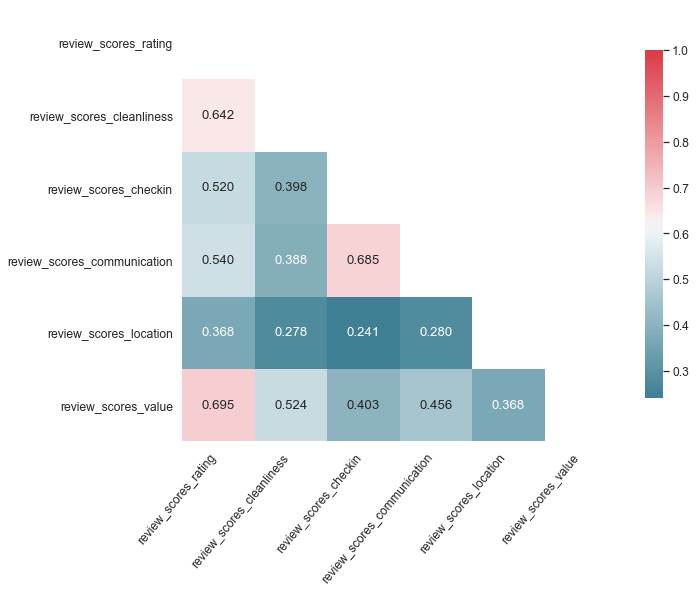

In [275]:
sns.set(font_scale = 1.1, style = "white")
mask = np.triu(np.ones_like(review_corr, dtype = np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
fig, ax = plt.subplots(figsize = (10,8))  
corr_hm = sns.heatmap(review_corr, cbar = True, cbar_kws={"shrink": .8}, 
                      annot = True, mask = mask, square = True,cmap = cmap, fmt = '.3f', ax = ax)
corr_hm.set_xticklabels(corr_hm.get_xticklabels(), rotation = 50, horizontalalignment = 'right')
plt.savefig('review_corr_matrix.png')
plt.show()

<h3 id='2.8'>  2.8 What types of places are the most expensive?  
 </h3>

In [180]:
df_property_type = df_listings.groupby(['property_type'])['price'].mean().reset_index()
df_property_type = df_property_type.sort_values('price', ascending=False)
df_property_type 

,property_type,price
3,Boat,282.375000
8,Condominium,151.109890
11,Loft,135.700000
10,House,132.351414
14,Townhouse,129.457627
1,Apartment,122.932670
6,Camper/RV,120.461538
0,100.0,120.000000
4,Bungalow,115.615385
2,Bed & Breakfast,112.054054


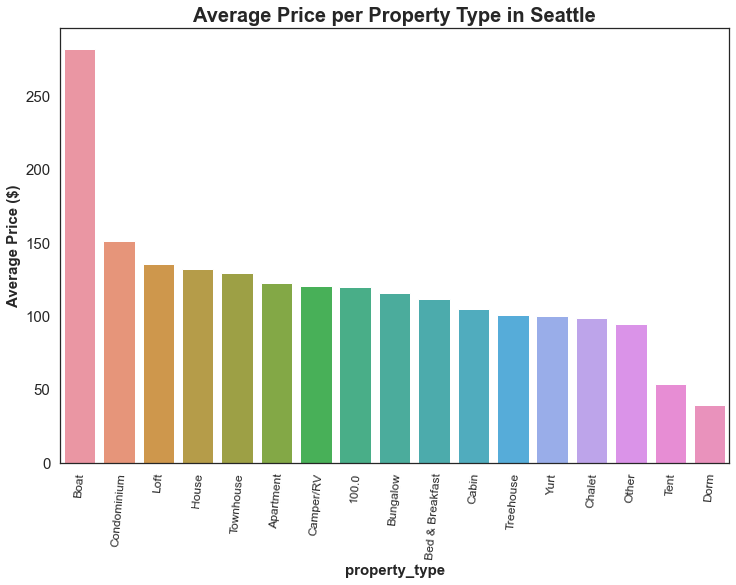

In [265]:
df_property_type_fig = plt.figure(figsize=(12,8))
ax = df_property_type_fig.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(x=df_property_type.property_type, y=df_property_type['price'])
ax.set_xlabel('property_type', weight='bold', size=15)
ax.set_ylabel('Average Price ($)', weight='bold', size=15)
plt.title('Average Price per Property Type in Seattle', weight='bold',fontsize=20)
ax.tick_params('x', labelsize=12, rotation=85)
ax.tick_params('y', labelsize=15)
plt.savefig('Average Price per Property Type in Seattle')
plt.show()


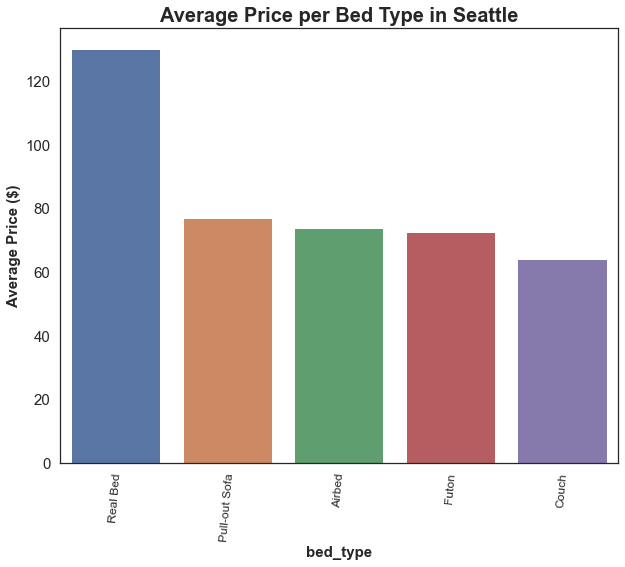

In [264]:
df_bed_type = df_listings.groupby(['bed_type'])['price'].mean().reset_index()
df_bed_type = df_bed_type.sort_values('price', ascending=False)
df_bed_type_fig = plt.figure(figsize=(10,8))
ax = df_bed_type_fig.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(x=df_bed_type.bed_type, y=df_bed_type['price'])
ax.set_xlabel('bed_type', weight='bold', size=15)
ax.set_ylabel('Average Price ($)', weight='bold', size=15)
plt.title('Average Price per Bed Type in Seattle', weight='bold',fontsize=20)
ax.tick_params('x', labelsize=12, rotation=85)
ax.tick_params('y', labelsize=15)
plt.savefig('Average Price per Bed Type in Seattle')
plt.show()

In [266]:
df_bed_type

,bed_type,price
4,Real Bed,130.368882
3,Pull-out Sofa,77.276596
0,Airbed,73.962963
2,Futon,72.824324
1,Couch,64.307692


In [183]:
df_room_type = df_listings.groupby(['room_type']).agg({'price':[('price','mean'),('std_price','std')]}).reset_index()
df_room_type

room_type       price           
                         price  std_price
0  Entire home/apt  155.843369  96.551181
1     Private room   75.044828  34.603905
2      Shared room   47.547009  19.372704

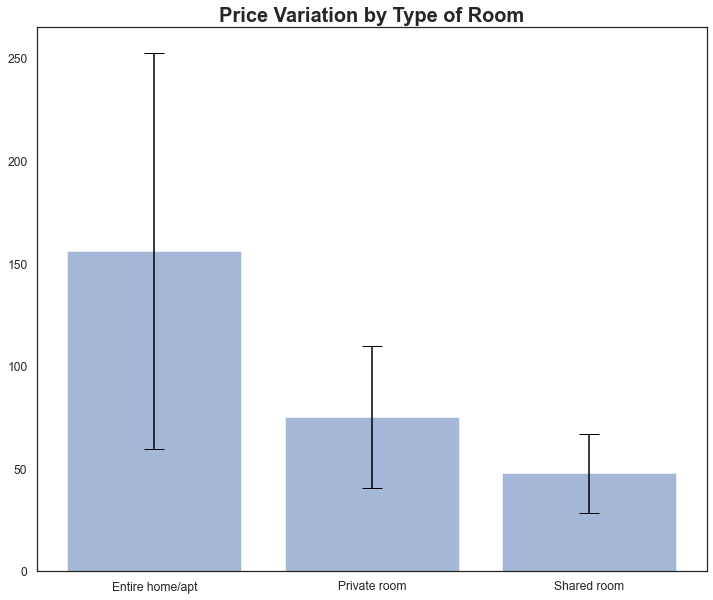

In [227]:
x = df_room_type['room_type'].tolist()
y = df_room_type[('price', 'price')].tolist()
err = df_room_type[('price', 'std_price')].tolist()
df_room_type_fig = plt.figure(figsize=(12,10))
ax = df_room_type_fig.add_subplot(1, 1, 1, aspect='auto')
ax.bar(np.arange(len(x)),y,yerr = err,align = 'center',alpha = 0.5,ecolor = 'black',capsize = 10)
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x)
ax.set_title('Price Variation by Type of Room', weight='bold',fontsize=20)
plt.savefig('Price Variation by Type of Room')

<h2 id='3.0'> 3.0 Predict overall listing price based on other factors about the property?</h2>

<h3 id='3.1'> 3.1 Leveraging the cleansed 'df_listings_subset' dataframe</h3>

In [185]:
df_listings_subset =df_listings_subset.drop(['neighbourhood_cleansed','amenities','state','id','host_id'], axis = 1)
df_listings_subset = df_listings_subset[df_listings_subset.city != '西雅图']
df_listings_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3817
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_time            3293 non-null   object 
 1   host_response_rate            3815 non-null   float64
 2   host_is_superhost             3813 non-null   object 
 3   host_total_listings_count     3815 non-null   int32  
 4   neighbourhood_group_cleansed  3815 non-null   object 
 5   property_type                 3815 non-null   object 
 6   room_type                     3815 non-null   object 
 7   accommodates                  3815 non-null   int64  
 8   bathrooms                     3815 non-null   int32  
 9   bedrooms                      3815 non-null   int32  
 10  beds                          3815 non-null   int32  
 11  bed_type                      3815 non-null   object 
 12  city                          3815 non-null   object 
 13  pri

<h3 id='3.2'> 3.2 Drop the rows with missing response values</h3>

In [186]:
(df_listings_subset.isnull().mean() * 100).sort_values(ascending = False).head(5)

host_response_time     13.682831
host_is_superhost       0.052425
guests_included         0.000000
instant_bookable        0.000000
review_scores_value     0.000000
dtype: float64

In [187]:
df_listings_subset = df_listings_subset.dropna(subset=['host_response_time'], how='any')
print(df_listings_subset.shape)
#df_listings_new.info()
#(df_listings_subset.isnull().mean() * 100).sort_values(ascending = False)

(3293, 27)


<h3 id='3.3'> 3.3 Create function for categorical variables</h3>

In [188]:
#Pull a list of the column names of the categorical variables
cat_cols_lst = ['host_response_time','neighbourhood_group_cleansed',\
            'property_type','room_type','bed_type','cancellation_policy', \
            'host_is_superhost','instant_bookable','city']

In [189]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), \
                            pd.get_dummies(df[col], prefix=col, \
                            prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [190]:
df_listings_new = create_dummy_df(df_listings_subset, cat_cols_lst, dummy_na=False)
df_listings_new.head(5)

,host_response_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,...,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,host_is_superhost_t,instant_bookable_t,city_Phinney Ridge Seattle,city_Seattle,city_Seattle,city_West Seattle
0,96.0,3,4,1,1,1,85.0,2,5.0,1,...,0,1,1,0,0,0,0,1,0,0
1,98.0,6,4,1,1,1,150.0,1,0.0,2,...,0,1,0,1,1,0,0,1,0,0
2,67.0,2,11,4,5,7,975.0,10,25.0,4,...,0,1,0,1,0,0,0,1,0,0
4,100.0,2,6,2,3,3,450.0,6,15.0,1,...,0,1,0,1,0,0,0,1,0,0
6,100.0,1,2,1,1,1,80.0,1,10.0,3,...,0,1,1,0,1,0,0,1,0,0


<h3 id='3.4'> 3.4 Build the model</h3>

In [191]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.2, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:

    1. Split your data into an X matrix and a response vector y
    2. Create training and test sets of data
    3. Instantiate a LinearRegression model with normalized data
    4. Fit your model to the training data
    5. Predict the response for the training data and the test data
    6. Obtain an rsquared value for both the training and test data
    '''
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)
    y_pred = lm_model.predict(X_test)
    mse = mean_squared_error(y_pred,y_test)
    rmse = math.sqrt(mse)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_train_preds, y_test, y_test_preds, mse, rmse

In [192]:
test_score, train_score, lm_model, X_train, X_test, y_train,\
y_train_preds, y_test, y_test_preds, mse, rmse = clean_fit_linear_mod(df_listings_new, 'price', cat_cols_lst, dummy_na=False)

C:\Users\freeman7\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


<h3 id='3.5'> 3.5 Print training and testing score</h3>

In [193]:
print("The rsquared on the training data was {}.".format(train_score))
print("The rsquared on the test data was {}.".format(test_score))
print("The root mean square error on the data was {}".format(rmse))

The rsquared on the training data was 0.5953018830685565.
The rsquared on the test data was 0.6364485414150072.
The root mean square error on the data was 50.52108210953303


<h3 id='3.6'> 3.6 Plot the residuals</h3>

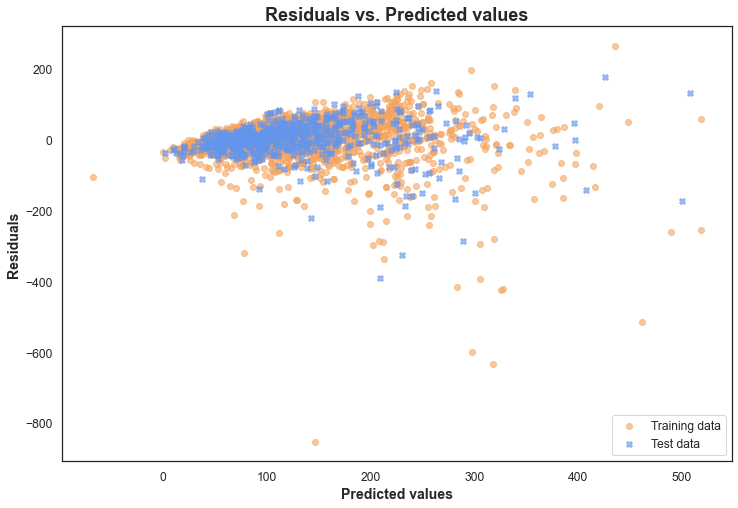

In [194]:
plt.figure(figsize = (12,8))
plt.scatter(y_train_preds,  y_train_preds - y_train, c = 'sandybrown', 
            marker = 'o', alpha = 0.6, label = 'Training data')
plt.scatter(y_test_preds,  y_test_preds - y_test, c = 'cornflowerblue', 
            marker = 'X', alpha = 0.6, label = 'Test data')

plt.xlabel('Predicted values', fontsize = 14, fontweight = 'bold')
plt.ylabel('Residuals', fontsize = 14, fontweight = 'bold')
plt.title('Residuals vs. Predicted values', fontsize = 18, fontweight = 'bold')
plt.legend(loc = 'lower right')

plt.savefig('Residuals vs Predicted Values.png')
plt.show()

In [195]:
X_test.head()

,host_response_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,minimum_nights,maximum_nights,...,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,host_is_superhost_t,instant_bookable_t,city_Phinney Ridge Seattle,city_Seattle,city_Seattle,city_West Seattle
3667,97.0,7,4,3,3,3,4,14.0,7,120,...,0,1,1,0,0,0,0,1,0,0
3661,100.0,3,2,1,1,2,1,0.0,3,1125,...,0,1,1,0,1,1,0,1,0,0
3587,100.0,1,2,1,0,1,1,0.0,2,7,...,0,1,1,0,0,0,0,1,0,0
2221,100.0,1,2,1,1,1,0,0.0,1,1125,...,0,1,1,0,1,0,0,1,0,0
2737,100.0,2,4,1,1,3,2,20.0,3,1125,...,0,1,1,0,0,0,0,1,0,0


<h3 id='3.6'> 3.6 Predict price from test set </h3>

In [224]:
lm_model.predict(np.array(X_test.sample(1)).reshape(1,-1))

C:\Users\freeman7\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([91.3307028])

<h2 id='4.0'>4.0 Analyzing neighborhoods in Seattle</h2>

<h3 id='4.1'>  4.1 What are the most requested neighborhoods in Seattle?</h3>

In [233]:
df_neighbourhood = df_listings[['neighbourhood_group_cleansed', 'city', 'state','price','review_scores_rating']]
df_neighbourhood = df_neighbourhood[df_neighbourhood.city != '西雅图']
df_neighbourhood.isna().sum()
#df_neighbourhood.head()
#df_neighbourhood.describe()
#df_neighbourhood.dtypes

neighbourhood_group_cleansed    0
city                            0
state                           0
price                           0
review_scores_rating            0
dtype: int64

In [234]:
neighbourhood_count = df_neighbourhood['neighbourhood_group_cleansed'].value_counts()
neighbourhood_count.head()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Name: neighbourhood_group_cleansed, dtype: int64

In [235]:
df_most_requested = pd.DataFrame({'neighbourhood_group_cleansed': neighbourhood_count.index,'requested_%': (neighbourhood_count.values/neighbourhood_count.sum())*100})
df_most_requested.sort_values('requested_%', ascending=False)
df_most_requested =df_most_requested.head(15)
df_most_requested

,neighbourhood_group_cleansed,requested_%
0,Other neighborhoods,20.801677
1,Capitol Hill,14.854598
2,Downtown,13.885250
3,Central Area,9.667278
4,Queen Anne,7.728583
5,Ballard,6.025675
6,West Seattle,5.318313
7,Rainier Valley,4.165575
8,University District,3.196227
9,Beacon Hill,3.065234


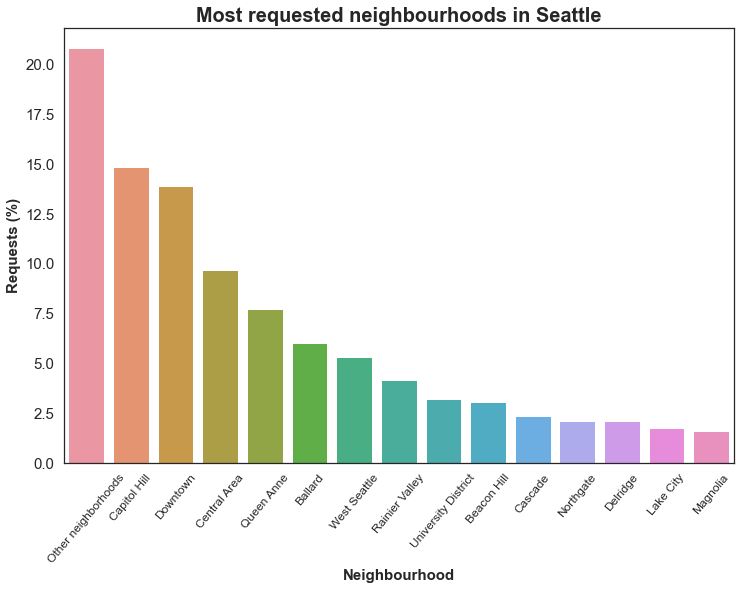

In [250]:
df_most_requested_fig = plt.figure(figsize=(12,8))
ax = df_most_requested_fig.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(x=df_most_requested.neighbourhood_group_cleansed, y=df_most_requested['requested_%'])
ax.set_xlabel('Neighbourhood', weight='bold', size=15)
ax.set_ylabel('Requests (%)', weight='bold', size=15)
plt.title('Most requested neighbourhoods in Seattle', weight='bold',fontsize=20)
ax.tick_params('x', labelsize=12, rotation=50)
ax.tick_params('y', labelsize=15)
plt.savefig('Most requested neighbourhoods in Seattle')
plt.show()

<h3 id='4.2'> 4.2 Which neighbourhoods have the lowest listing price? </h3>

In [238]:
min_neigh = df_neighbourhood[df_neighbourhood['price']==df_neighbourhood['price'].min()]
min_neigh

,neighbourhood_group_cleansed,city,state,price,review_scores_rating
53,Queen Anne,Seattle,WA,20.0,94.539262


<h3 id='4.3'>  4.3 Which neighbourhoods have the highest listing price? </h3>

In [239]:
max_neigh = df_neighbourhood[df_neighbourhood['price']==df_neighbourhood['price'].max()]
max_neigh

,neighbourhood_group_cleansed,city,state,price,review_scores_rating
3122,Other neighborhoods,Seattle,WA,1000.0,100.0


<h3 id='4.4'>  4.4  What is the Average, Minimum and Maximum listing price for each neighbourhood? </h3>


In [240]:
df_neighbourhood2 = df_neighbourhood[['price']]
df_neighbourhood2.index = df_neighbourhood['neighbourhood_group_cleansed']
result = df_neighbourhood2.groupby('neighbourhood_group_cleansed').agg({'price': ['mean', 'min', 'max']})
result =result.sort_values(('price', 'mean'), ascending=False)
result

price              
                                    mean   min     max
neighbourhood_group_cleansed                          
Magnolia                      177.672131  30.0   950.0
Queen Anne                    157.223729  20.0   975.0
Downtown                      154.405660  35.0   999.0
West Seattle                  141.359606  30.0   495.0
Cascade                       140.101124  42.0   775.0
Capitol Hill                  130.592593  22.0   750.0
Central Area                  128.338753  35.0   500.0
Ballard                       124.682609  25.0   475.0
Other neighborhoods           119.968514  25.0  1000.0
Interbay                      109.727273  50.0   250.0
Seward Park                   108.477273  34.0   375.0
Beacon Hill                    95.153846  30.0   399.0
University District            93.639344  28.0   350.0
Lake City                      92.671642  35.0   252.0
Rainier Valley                 91.899371  25.0   300.0
Northgate                      88.550000  30.0   200.0
Delridge                       83.278481  35.0   300.0

<h3 id='4.5'>  4.5  Plot the neighbourhoods with the highest average listing price </h3>

In [252]:
df_avgprice = df_neighbourhood.groupby(['neighbourhood_group_cleansed'])['price'].mean().reset_index()
df_avgprice = df_avgprice.sort_values('price', ascending=False)
df_avgprice

,neighbourhood_group_cleansed,price
9,Magnolia,177.672131
12,Queen Anne,157.223729
6,Downtown,154.405660
16,West Seattle,141.359606
3,Cascade,140.101124
2,Capitol Hill,130.592593
4,Central Area,128.338753
0,Ballard,124.682609
11,Other neighborhoods,119.968514
7,Interbay,109.727273


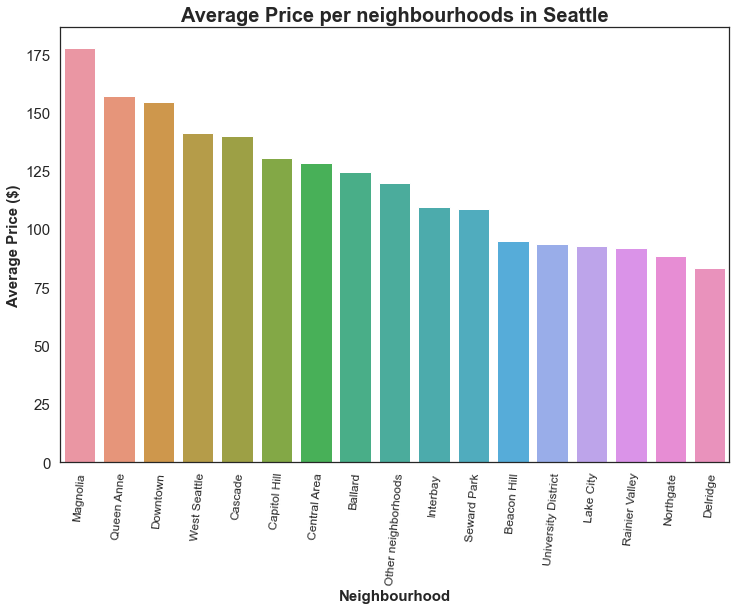

In [249]:
df_avgprice_fig = plt.figure(figsize=(12,8))
ax = df_avgprice_fig.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(x=df_avgprice.neighbourhood_group_cleansed, y=df_avgprice['price'])
ax.set_xlabel('Neighbourhood', weight='bold', size=15)
ax.set_ylabel('Average Price ($)', weight='bold', size=15)
plt.title('Average Price per neighbourhoods in Seattle', weight='bold',fontsize=20)
ax.tick_params('x', labelsize=12, rotation=85)
ax.tick_params('y', labelsize=15)
plt.savefig('Average Price per neighbourhoods in Seattle')
plt.show()

<h3 id='4.6'>  4.6 Which neighborhoods have the highest rating review scores? </h3>

In [263]:
df_neighbourhood3 = df_neighbourhood[['review_scores_rating']]
df_neighbourhood3.index = df_neighbourhood['neighbourhood_group_cleansed']
result = df_neighbourhood3.groupby('neighbourhood_group_cleansed').agg({'review_scores_rating': ['mean', 'min', 'max','count']})
result =result.sort_values(('review_scores_rating', 'mean'), ascending=False)
result

review_scores_rating                   
                                             mean   min    max count
neighbourhood_group_cleansed                                        
Central Area                            95.810198  60.0  100.0   369
Delridge                                95.627211  80.0  100.0    79
West Seattle                            95.596600  80.0  100.0   203
Ballard                                 95.373707  71.0  100.0   230
Queen Anne                              95.292962  40.0  100.0   295
Seward Park                             94.970371  80.0  100.0    44
Rainier Valley                          94.701142  40.0  100.0   159
Northgate                               94.663612  80.0  100.0    80
Other neighborhoods                     94.558461  53.0  100.0   794
Lake City                               94.401968  76.0  100.0    67
Capitol Hill                            94.251677  60.0  100.0   567
Beacon Hill                             94.128965  70.0  100.0   117
Downtown                                94.039444  20.0  100.0   530
Magnolia                                93.959831  60.0  100.0    61
Interbay                                93.916229  80.0  100.0    11
Cascade                                 93.021823  40.0  100.0    89
University District                     89.737876  60.0  100.0   122

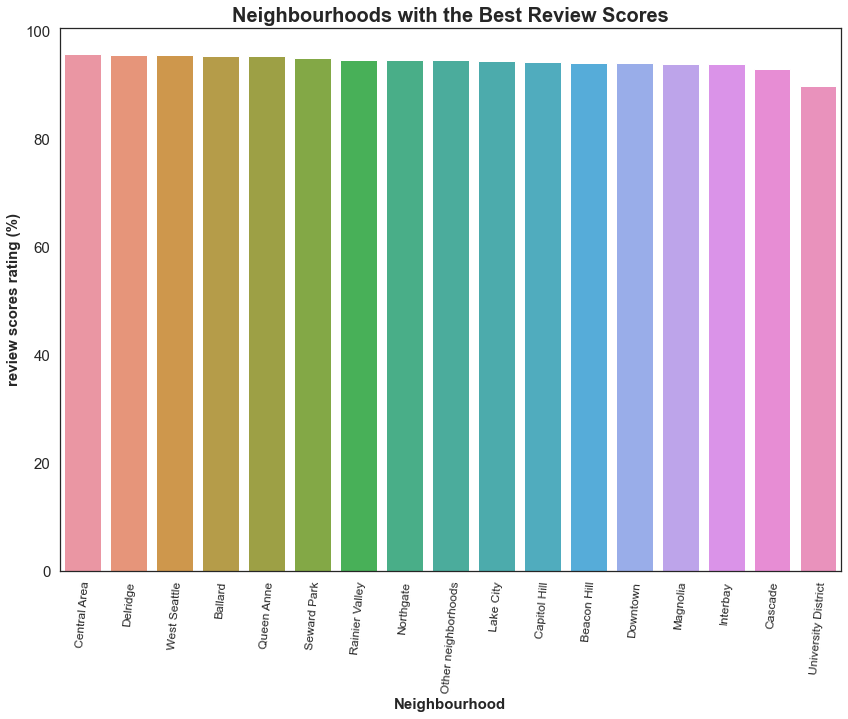

In [248]:
df_avgreview = df_neighbourhood.groupby(['neighbourhood_group_cleansed'])['review_scores_rating'].mean().reset_index()
df_avgreview = df_avgreview.sort_values('review_scores_rating', ascending=False)
df_avgreview_fig = plt.figure(figsize=(14,10))
ax = df_avgreview_fig.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(x=df_avgreview.neighbourhood_group_cleansed, y=df_avgreview['review_scores_rating'])
ax.set_xlabel('Neighbourhood', weight='bold', size=15)
ax.set_ylabel('review scores rating (%)', weight='bold', size=15)
plt.title('Neighbourhoods with the Best Review Scores', weight='bold',fontsize=20)
ax.tick_params('x', labelsize=12, rotation=85)
ax.tick_params('y', labelsize=15)
plt.savefig('Neighbourhoods with the Best Review Scores')
plt.show()

<h2 id='5.0'> 5.0 Importing calendar.csv & Exploring the data</h2>

In [208]:
df_calendar = pd.read_csv('./calendar.csv')

##### Convert price to float

In [209]:
df_calendar['price'] = df_calendar['price'].astype(str).str.replace(',','').str.replace('$','').astype(float) 
#count number of na in cols

C:\Users\freeman7\AppData\Local\Temp\ipykernel_24328\3158093375.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_calendar['price'] = df_calendar['price'].astype(str).str.replace(',','').str.replace('$','').astype(float)


##### Count na in all columns

In [210]:
df_calendar.isna().sum()
#df_calendar.head()
#df_calendar.dtypes

listing_id         0
date               0
available          0
price         459028
dtype: int64

##### Removing rows where price is null to aid future calculations

In [211]:
df_calendar = df_calendar[df_calendar['price'].notna()]
#number of rows in the dataset
num_rows = df_calendar.shape[0] 
#number of columns in the dataset
num_cols = df_calendar.shape[1] 
(num_rows, num_cols)
df_calendar.describe()

,listing_id,price
count,9.345420e+05,934542.000000
mean,5.305517e+06,137.944859
std,2.974821e+06,105.062870
min,3.335000e+03,10.000000
25%,2.875975e+06,75.000000
50%,5.615620e+06,109.000000
75%,7.873345e+06,160.000000
max,1.034016e+07,1650.000000


##### Data Cleansing

In [212]:
df_calendar['listing_id'] = df_calendar['listing_id'].astype(str)
df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month_name()
df_calendar['year'] = pd.DatetimeIndex(df_calendar['date']).year
df_calendar['month_year'] = pd.to_datetime(df_calendar['date']).dt.to_period('M')
df_calendar['date'] = pd.to_datetime(df_calendar['date']) 
df_calendar.head()
#df_calendar.dtypes

,listing_id,date,available,price,month,year,month_year
0,241032,2016-01-04,t,85.0,January,2016,2016-01
1,241032,2016-01-05,t,85.0,January,2016,2016-01
9,241032,2016-01-13,t,85.0,January,2016,2016-01
10,241032,2016-01-14,t,85.0,January,2016,2016-01
14,241032,2016-01-18,t,85.0,January,2016,2016-01


<h3 id='5.1'> 5.1 Visualizing the calendar data</h3>

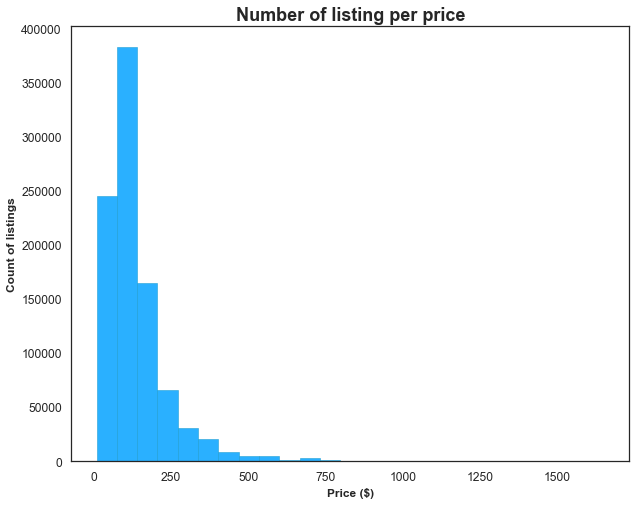

In [213]:
plt.figure(figsize = (10,8))
plt.hist(df_calendar['price'],bins=25,facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.xlabel('Price ($)', fontweight = 'bold',fontsize = 12 )
plt.ylabel('Count of listings', fontweight = 'bold',fontsize = 12)
plt.title('Number of listing per price', fontsize = 18, fontweight = 'bold')
plt.savefig('Number of listing per price')
plt.show()

##### Quick Statistics

In [214]:
min = df_calendar['price'].min()
max = df_calendar['price'].max()
avg = df_calendar['price'].mean()
min_date = df_calendar['date'].min()
max_date = df_calendar['date'].max()
print("There minimum listing price is ${}, the max is ${}, and the average is ${}, stretching over the period {} & {}.".format(min, max, round(avg), min_date,max_date))

There minimum listing price is $10.0, the max is $1650.0, and the average is $138, stretching over the period 2016-01-04 00:00:00 & 2017-01-02 00:00:00.


<h3 id='5.2'> 5.2 Calculating the price difference for each month from the average listing price</h3>

In [215]:
price_by_date = df_calendar[['date','price']]
price_by_date['diff_mean'] = price_by_date['price'] - avg
price_by_date.index = df_calendar['month_year']
price_by_date.head()


C:\Users\freeman7\AppData\Local\Temp\ipykernel_24328\2217101698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_by_date['diff_mean'] = price_by_date['price'] - avg


,date,price,diff_mean
month_year,,,
2016-01,2016-01-04,85.0,-52.944859
2016-01,2016-01-05,85.0,-52.944859
2016-01,2016-01-13,85.0,-52.944859
2016-01,2016-01-14,85.0,-52.944859
2016-01,2016-01-18,85.0,-52.944859


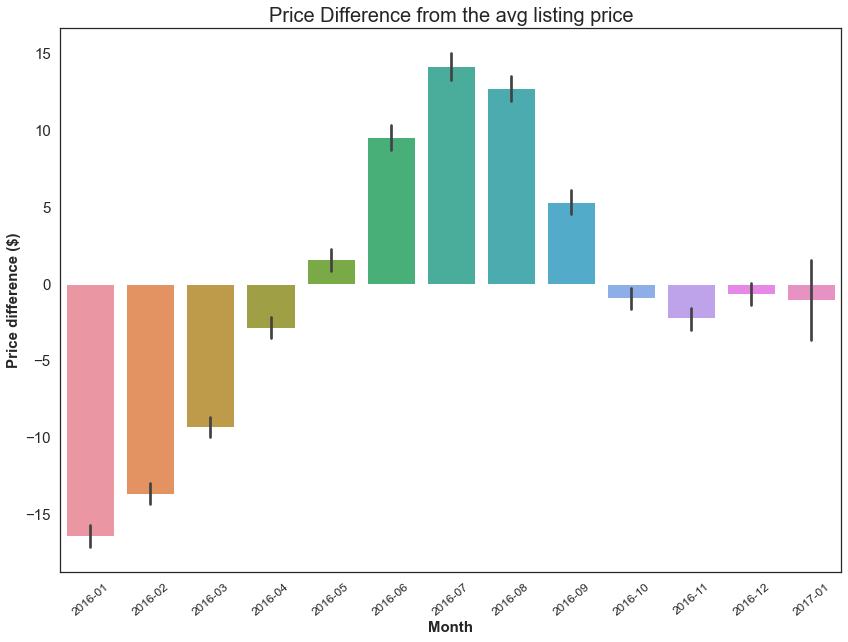

In [231]:
# Plot the price difference
price_diff = plt.figure(figsize=(14,10))
ax = price_diff.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(x=price_by_date.index, y=price_by_date['diff_mean'])
ax.set_xlabel('Month', weight='bold', size=15)
ax.set_ylabel('Price difference ($)', weight='bold', size=15)
plt.title('Price Difference from the avg listing price', fontsize=20)
ax.tick_params('x', labelsize=12, rotation=40)
ax.tick_params('y', labelsize=15)
plt.savefig('Price Difference from the avg listing price')
plt.show()

<h3 id='5.3'> 5.3 What is the average, maximum and minimum listing price each month? </h3>

In [217]:
price_by_date2 = price_by_date[['price']]
result = price_by_date2.groupby('month_year').agg({'price': ['mean', 'min', 'max']})
result

price              
                  mean   min     max
month_year                          
2016-01     121.568409  12.0  1000.0
2016-02     124.293927  20.0  1000.0
2016-03     128.644488  20.0  1099.0
2016-04     135.097005  20.0  1099.0
2016-05     139.538183  20.0  1099.0
2016-06     147.473137  20.0  1099.0
2016-07     152.094150  20.0  1240.0
2016-08     150.656594  20.0  1250.0
2016-09     143.255949  20.0  1450.0
2016-10     137.031939  20.0  1650.0
2016-11     135.688738  10.0  1650.0
2016-12     137.251835  20.0  1650.0
2017-01     136.882590  20.0  1000.0

<h3 id='5.4'> 5.4 Plot the average listing price </h3>

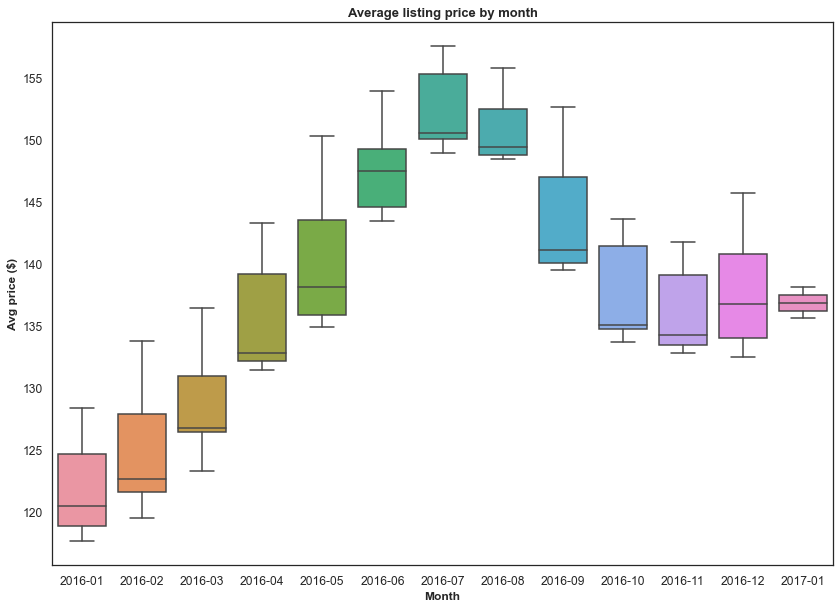

In [218]:
df_avg_price = df_calendar.groupby(['date', 'month_year'])['price'].mean().reset_index()
plt.figure(figsize = (14,10))
sns.boxplot(df_avg_price['month_year'], df_avg_price['price'])

plt.ylabel('Avg price ($)', fontsize = 12, fontweight = 'bold')
plt.xlabel('Month', fontsize = 12, fontweight = 'bold')
plt.title('Average listing price by month', fontsize = 13, fontweight = 'bold')

plt.savefig('Average listing price by month')
plt.show()

In [219]:
df_calendar.head()

,listing_id,date,available,price,month,year,month_year
0,241032,2016-01-04,t,85.0,January,2016,2016-01
1,241032,2016-01-05,t,85.0,January,2016,2016-01
9,241032,2016-01-13,t,85.0,January,2016,2016-01
10,241032,2016-01-14,t,85.0,January,2016,2016-01
14,241032,2016-01-18,t,85.0,January,2016,2016-01


In [220]:
df_busiest_time= df_calendar['month_year'].value_counts().reset_index()
df_busiest_time.index = df_busiest_time['index']
df_busiest_time =df_busiest_time.drop(['index'], axis = 1)
df_busiest_time

,month_year
index,
2016-12,87061
2016-03,83938
2016-10,82438
2016-11,81780
2016-05,79971
2016-09,77246
2016-06,77244
2016-08,76347
2016-04,76037


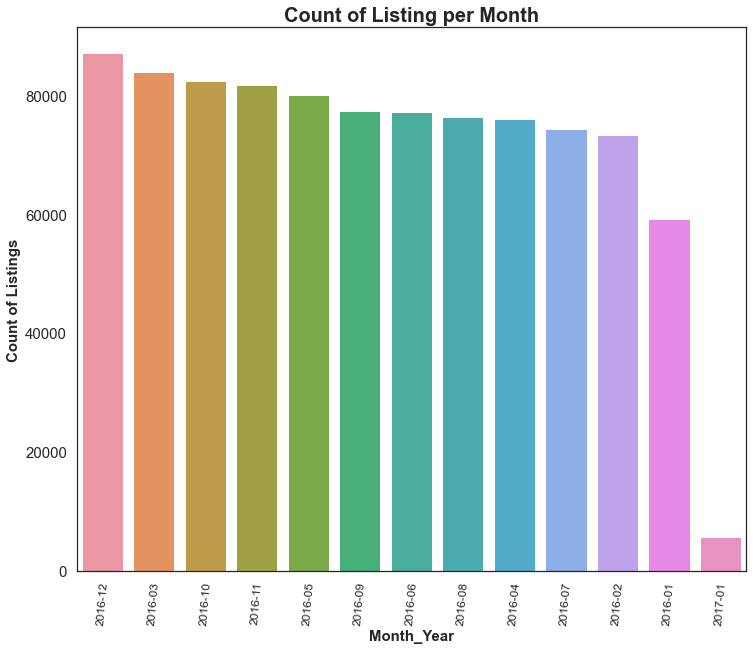

In [232]:
df_busiest_time_fig = plt.figure(figsize=(12,10))
ax = df_busiest_time_fig.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(x=df_busiest_time.index, y=df_busiest_time['month_year'])
ax.set_xlabel('Month_Year', weight='bold', size=15)
ax.set_ylabel('Count of Listings', weight='bold', size=15)
plt.title('Count of Listing per Month', weight='bold',fontsize=20)
ax.tick_params('x', labelsize=12, rotation=85)
ax.tick_params('y', labelsize=15)
plt.savefig('Count of Listing per Month')
plt.show()